# Iris Flower Cluster Prediction
> ## Task 2: ``Prediction using Unsupervised ML``
> #### Author: `Kunwardeep Singh Jagdev`
> ### Task Goals: ``Predict the optimum number of cluster and represent it visually.``

## **Importing the necessary Libraries and Dataset** 

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
## Importing the dataset
iris_df = pd.read_csv("./Dataset/iris.csv")
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Finding the optimum numer of clusters for K-means Classification
> A commonly used method for finding optimal K value is Elbow Method. In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. 

Text(0, 0.5, 'Within-Cluster Sum of Square')

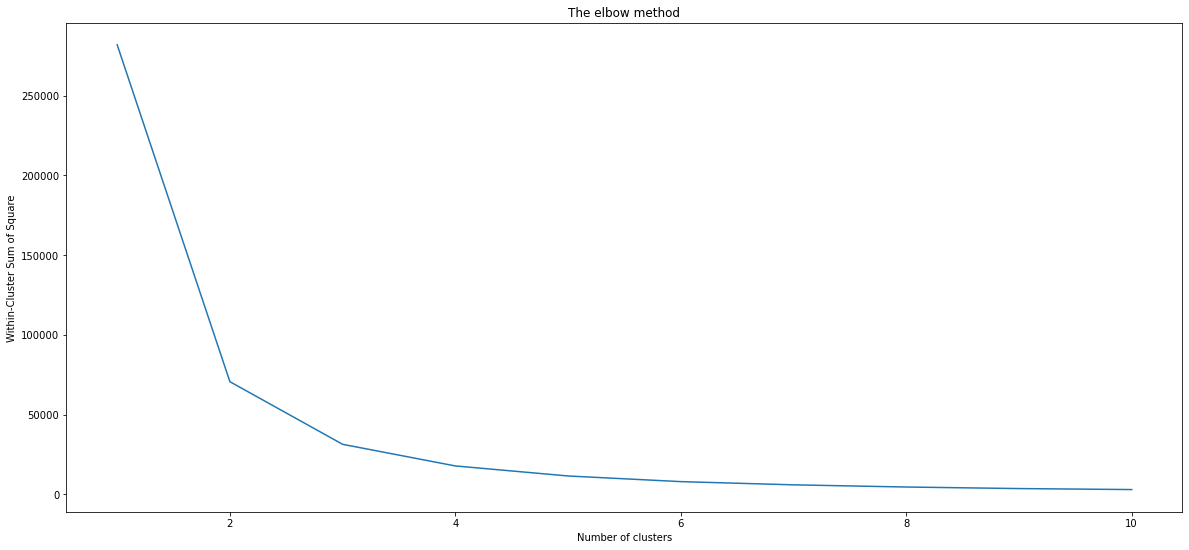

In [4]:
import warnings
warnings.filterwarnings('ignore')

x = iris_df.iloc[:, [0,1,2,3]].values

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting results on to a graph to observe the elbow method
plt.figure(figsize= (20,9))
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Square")

> From the above graph we chose the number of clusters as 3

In [5]:
## Implementing/Creating the kmeans classifier
kmeans = KMeans(n_clusters= 3, init= "k-means++", max_iter= 300, n_init= 10, random_state=0)

y_kmeans = kmeans.fit_predict(x)

> Visualising the clusters

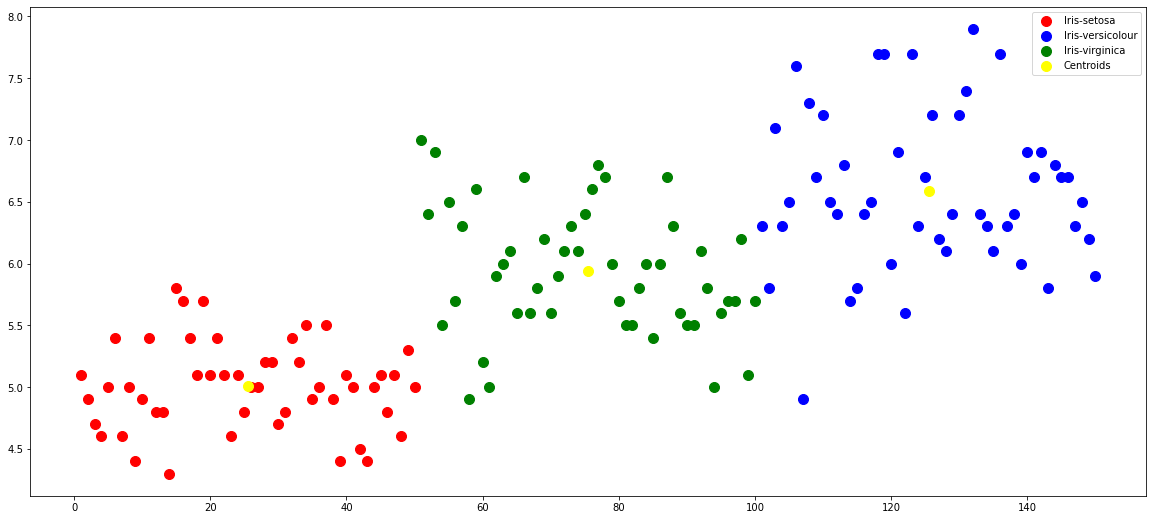

In [6]:
plt.figure(figsize= (20,9))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()